In [9]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [2]:
# Define Bohachevsky function f1 and its gradient
def f1(x, y):
    return x**2 + 2*y**2 - 0.3*np.cos(3*np.pi*x) - 0.4*np.cos(4*np.pi*y) + 0.7

def grad_f1(x, y):
    df_dx = 2*x + 0.9*np.pi*np.sin(3*np.pi*x)
    df_dy = 4*y + 1.6*np.pi*np.sin(4*np.pi*y)
    return np.array([df_dx, df_dy])

def hessian_f1(x, y):
    d2f_dx2 = 2 + 2.7*(np.pi**2)*np.cos(3*np.pi*x)
    d2f_dy2 = 4 + 6.4*(np.pi**2)*np.cos(4*np.pi*y)
    d2f_dxdy = 0
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

# Armijo's Rule Function

In [3]:
# Armijo's rule for backtracking line search
def armijo_rule(f, grad_f, x, d_k, epsilon_0=1, beta=0.5, sigma=10**(-4)):
    fx = f(x[0], x[1])
    grad_fx = grad_f(x[0], x[1])
    epsilon = epsilon_0
    while True:
        if f(x[0] + epsilon * d_k[0], x[1] + epsilon * d_k[1]) <= fx + sigma * epsilon * np.dot(grad_fx, d_k):
            break
        epsilon *= beta
    return epsilon

In [4]:
# Trust region method
def trust_region_step(grad, hess, delta=1.0):
    try:
        p = -np.linalg.inv(hess).dot(grad)
    except np.linalg.LinAlgError:
        p = -grad
    if np.linalg.norm(p) > delta:
        p = delta * p / np.linalg.norm(p)
    return p

# Newton method with Trust region

In [5]:
# Steepest Descent with Armijo's Rule
def newton_method(f, grad_f, hessian_f, x0, tol=1e-6, max_iter=1000):
    x_k = np.array(x0)
    path = [x_k.copy()]
    function_evals = 0
    gradient_evals = 0
    for k in range(max_iter):
        grad_k = grad_f(x_k[0], x_k[1])
        gradient_evals += 1
        if np.linalg.norm(grad_k) < tol or np.isnan(np.linalg.norm(grad_k)):
            break
        hess = hessian_f(x_k[0], x_k[1])
        epsilon_k = trust_region_step(grad_k, hess)
        x_k = x_k + (x_k * epsilon_k)
        function_evals += 1
        path.append(x_k.copy())
    return np.array(path), function_evals, gradient_evals

# Steepest Descent with Armijo's Rule

In [6]:
# Steepest Descent with Armijo's Rule
def steepest_descent(f, grad_f, x0, tol=1e-6, max_iter=1000):
    x_k = np.array(x0)
    path = [x_k.copy()]
    function_evals = 0
    gradient_evals = 0
    for k in range(max_iter):
        grad_k = grad_f(x_k[0], x_k[1])
        gradient_evals += 1
        if np.linalg.norm(grad_k) < tol or np.isnan(np.linalg.norm(grad_k)):
            break
        d_k = -grad_k
        epsilon_k = armijo_rule(f, grad_f, x_k, d_k)   ## change this to Armijo
        x_k = x_k + (epsilon_k * d_k)
        function_evals += 1
        path.append(x_k.copy())
    return np.array(path), function_evals, gradient_evals

# Hybrid Method

In [7]:
# Hybrid method
def hybrid_method(f, grad_f, hessian_f, x0, use_armijo=False, tol=1e-6, max_iter=1000):
    x_k = np.array(x0)
    path = [x_k.copy()]
    function_evals = 0
    gradient_evals = 0
    for k in range(max_iter):
        grad_k = grad_f(x_k[0], x_k[1])
        gradient_evals += 1
        if np.linalg.norm(grad_k) < tol or np.isnan(np.linalg.norm(grad_k)):
            break
        d_k = -grad_k
        if use_armijo:
            epsilon_k = armijo_rule(f, grad_f, x_k, d_k, 0.3)
            x_k = x_k + (epsilon_k * d_k)
        else:
            hess = hessian_f(x_k[0], x_k[1])
            epsilon_k = trust_region_step(grad_k, hess)
            x_k = x_k + (x_k * epsilon_k)
            use_armijo=True
        function_evals += 1
        path.append(x_k.copy())
    return np.array(path), function_evals, gradient_evals

Trust Region Newton method: Time=0.0385980000s, Function Evals=1000, Gradient Evals=1000
Steepest Descent with Armijo's Rule: Time=0.0007537000s, Function Evals=26, Gradient Evals=27
Hybrid Method: Time=0.0004345000s, Function Evals=16, Gradient Evals=17


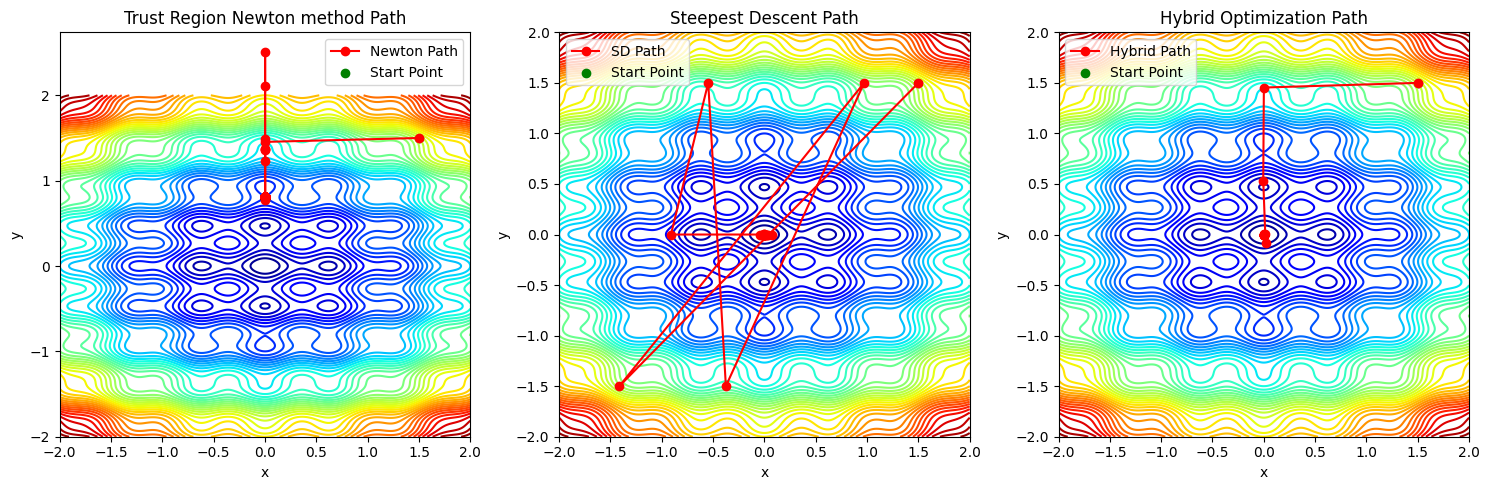

In [12]:
# Initial point
x0 = np.array([1.5, 1.5])

# Plot the results
X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
Z = f1(X, Y)

# Measure and run newton method
st_newton = timeit.default_timer()
path_newton, fevals_newton, gevals_newton = newton_method(f1, grad_f1, hessian_f1, x0)
time_newton = timeit.default_timer() - st_newton

# Measure and run Steepest Descent with Armijo's Rule
st_sd_armijo = timeit.default_timer()
path_sd_armijo, fevals_sd_armijo, gevals_sd_armijo = steepest_descent(f1, grad_f1, x0)
time_sd_armijo = timeit.default_timer() - st_sd_armijo

# Measure and run Hybrid Method
st_hybrid = timeit.default_timer()
path_sd_hybrid, fevals_sd_hybrid, gevals_sd_hybrid = hybrid_method(f1, grad_f1, hessian_f1, x0, use_armijo=False)
time_sd_hybrid = timeit.default_timer() - st_hybrid

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.contour(X, Y, Z, levels=50, cmap='jet')
plt.plot(path_newton[:, 0], path_newton[:, 1], 'ro-', label='Newton Path')
plt.scatter(x0[0], x0[1], color='green', label='Start Point')
plt.title('Trust Region Newton method Path')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 3, 2)
plt.contour(X, Y, Z, levels=50, cmap='jet')
plt.plot(path_sd_armijo[:, 0], path_sd_armijo[:, 1], 'ro-', label='SD Path')
plt.scatter(x0[0], x0[1], color='green', label='Start Point')
plt.title('Steepest Descent Path')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 3, 3)
plt.contour(X, Y, Z, levels=50, cmap='jet')
plt.plot(path_sd_hybrid[:, 0], path_sd_hybrid[:, 1], 'ro-', label='Hybrid Path')
plt.scatter(x0[0], x0[1], color='green', label='Start Point')
plt.title('Hybrid Optimization Path')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

print(f"Trust Region Newton method: Time={time_newton:.10f}s, Function Evals={fevals_newton}, Gradient Evals={gevals_newton}")
print(f"Steepest Descent with Armijo's Rule: Time={time_sd_armijo:.10f}s, Function Evals={fevals_sd_armijo}, Gradient Evals={gevals_sd_armijo}")
print(f"Hybrid Method: Time={time_sd_hybrid:.10f}s, Function Evals={fevals_sd_hybrid}, Gradient Evals={gevals_sd_hybrid}")

plt.tight_layout()
plt.show()